<a href="https://colab.research.google.com/github/JackSandford/ECK/blob/main/Self_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing data

In [34]:
import os
import pandas as pd
import json 
from google.colab import drive
import matplotlib.pyplot as plt

def mount_drive():
  drive.mount('/content/drive', force_remount=True)
  project_dir = "/content/drive/MyDrive/OneHourOfData"
  return project_dir

def unmount_drive():
  drive.flush_and_unmount()
  print('Drive Unmounted')

def get_file_names(project_dir):
  path = os.path.join(os.getcwd(),project_dir)
  filenames = [os.path.join(path,i) for i in os.listdir(path) if os.path.isfile(os.path.join(path,i))]
  return filenames


project_dir = mount_drive()

filenames = get_file_names(project_dir)
filenames = filenames[:6]

Mounted at /content/drive


In [4]:
regs = pd.read_csv('https://raw.githubusercontent.com/futureCodersSE/python-programming-for-data/main/Datasets/bus_regs.csv')
ohod = pd.read_json('/content/drive/MyDrive/OneHourOfData/busdata_22-09-07_08-07-48.json')

Creating a pie chart showing percentages of each type of bus

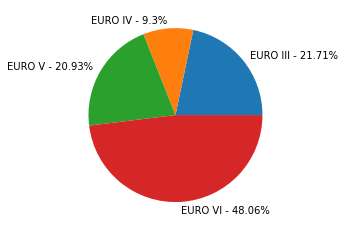

In [39]:
def types_of_buses():
  euro3buses = []
  euro4buses = []
  euro5buses = []
  euro6buses = []
  euro3regslist = []
  euro4regslist = []
  euro5regslist = []
  euro6regslist = []
  mvj = pd.json_normalize(ohod.MonitoredVehicleJourney)
  euro3regs = regs[regs['Emission Class'] == 'EURO III']
  for reg in euro3regs['Last tracked']:
    euro3regslist.append(reg)
  euro4regs = regs[regs['Emission Class'] == 'EURO IV']
  for reg in euro4regs['Last tracked']:
    euro4regslist.append(reg)
  euro5regs = regs[regs['Emission Class'] == 'EURO V']
  for reg in euro5regs['Last tracked']:
    euro5regslist.append(reg)
  euro6regs = regs[regs['Emission Class'] == 'EURO VI']
  for reg in euro6regs['Last tracked']:
    euro6regslist.append(reg)
  euro3buses = mvj[mvj['VehicleRef'].isin(euro3regslist)]
  euro4buses = mvj[mvj['VehicleRef'].isin(euro4regslist)]
  euro5buses = mvj[mvj['VehicleRef'].isin(euro5regslist)]
  euro6buses = mvj[mvj['VehicleRef'].isin(euro6regslist)]
  numbersbuses = (len(euro3buses), len(euro4buses), len(euro5buses), len(euro6buses))
  total_length = len(euro3buses) + len(euro4buses) + len(euro5buses) + len(euro6buses)
  percentage3 = round((len(euro3buses) / total_length) * 100, 2)
  percentage4 = round((len(euro4buses) / total_length) * 100, 2)
  percentage5 = round((len(euro5buses) / total_length) * 100, 2)
  percentage6 = round((len(euro6buses) / total_length) * 100, 2)
  keys = (('EURO III - {}%'.format(percentage3)), ('EURO IV - {}%'.format(percentage4)), ('EURO V - {}%'.format(percentage5)), ('EURO VI - {}%'.format(percentage6)))
  return plt.pie(numbersbuses, labels = keys)
  #return percentage3
types_of_buses()

mvj = pd.json_normalize(ohod.MonitoredVehicleJourney)
ext = pd.json_normalize(ohod.Extensions)

#display(euro3regs)

Sorting for EURO III only

In [60]:
def euro_class_only(df, euro):
  euroxbuses = []
  euroxregslist = []
  mvj = pd.json_normalize(df.MonitoredVehicleJourney)
  euroxregs = regs[regs['Emission Class'] == euro]
  for reg in euroxregs['Last tracked']:
    euroxregslist.append(reg)
  euroxbuses = mvj[mvj['VehicleRef'].isin(euroxregslist)]
  return euroxbuses

euro3_buses = euro_class_only(ohod, 'EURO III')
print(len(euro3_buses))

display(mvj)
#mvj['LineRef'].value_counts()

28


,LineRef,DirectionRef,PublishedLineName,OperatorRef,OriginRef,OriginName,DestinationRef,DestinationName,OriginAimedDepartureTime,DestinationAimedArrivalTime,Bearing,BlockRef,VehicleRef,FramedVehicleJourneyRef.DataFrameRef,FramedVehicleJourneyRef.DatedVehicleJourneyRef,VehicleLocation.Longitude,VehicleLocation.Latitude
0,7,inbound,7,AKSS,2400A013900A,Railway_Station,2400A050670A,Chequers_Bus_Station,2022-09-07T06:41:00+00:00,2022-09-07T08:17:00+00:00,6.0,0561,6516,2022-09-07,1007,0.512874,51.271258
1,1,outbound,1,AKSS,249000000619,The_Strand,249000000700,Chatham_Railway_Station,2022-09-07T07:50:00+00:00,2022-09-07T08:18:00+00:00,217.0,0396,4281,2022-09-07,1000,0.533265,51.396786
2,132,outbound,132,AKSS,249000000823,Hempstead_Valley_Shopping_Centre,249000000311,Grammar_Schools,2022-09-07T07:01:00+00:00,2022-09-07T08:12:00+00:00,183.0,0509,6421,2022-09-07,1020,0.499678,51.374453
3,190,inbound,190,AKSS,2490101073,Waterfront_Bus_Station,2400A018250A,Gravesend_Railway_Station,2022-09-07T07:00:00+00:00,2022-09-07T07:45:00+00:00,NaN,0354,4312,2022-09-07,1003,0.392910,51.432988
4,101,outbound,101,AKSS,2400A000780A,Pudding_Lane,249000000638,Duncan_Road,2022-09-07T07:24:00+00:00,2022-09-07T08:07:00+00:00,347.0,0583,6475,2022-09-07,1008,0.525113,51.385695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,166,inbound,166,AKSS,249000000872,The_Kestrel_Shopping_Centre,2490101063,Waterfront_Bus_Station,2022-09-07T07:50:00+00:00,2022-09-07T08:28:00+00:00,46.0,0322,4314,2022-09-07,1037,0.536795,51.355680
128,140,outbound,140,AKSS,249000000040,Bligh_Way_Shops,2490101072,Waterfront_Bus_Station,2022-09-07T07:05:00+00:00,2022-09-07T07:31:00+00:00,NaN,0508,6420,2022-09-07,1014,0.523851,51.384098
129,155,inbound,155,AKSS,2490101084,Waterfront_Bus_Station,249000000379,Village_Surgery,2022-09-07T09:03:00+00:00,2022-09-07T09:19:00+00:00,190.0,0516,6413,2022-09-07,1013,0.498043,51.362855
130,692,inbound,692,AKSS,249000000089,The_Nags_Head,249000000311,Grammar_Schools,2022-09-07T06:48:00+00:00,2022-09-07T08:02:00+00:00,NaN,0514,6442,2022-09-07,1001,0.499408,51.371068


Showing how many EURO III buses on each route there are

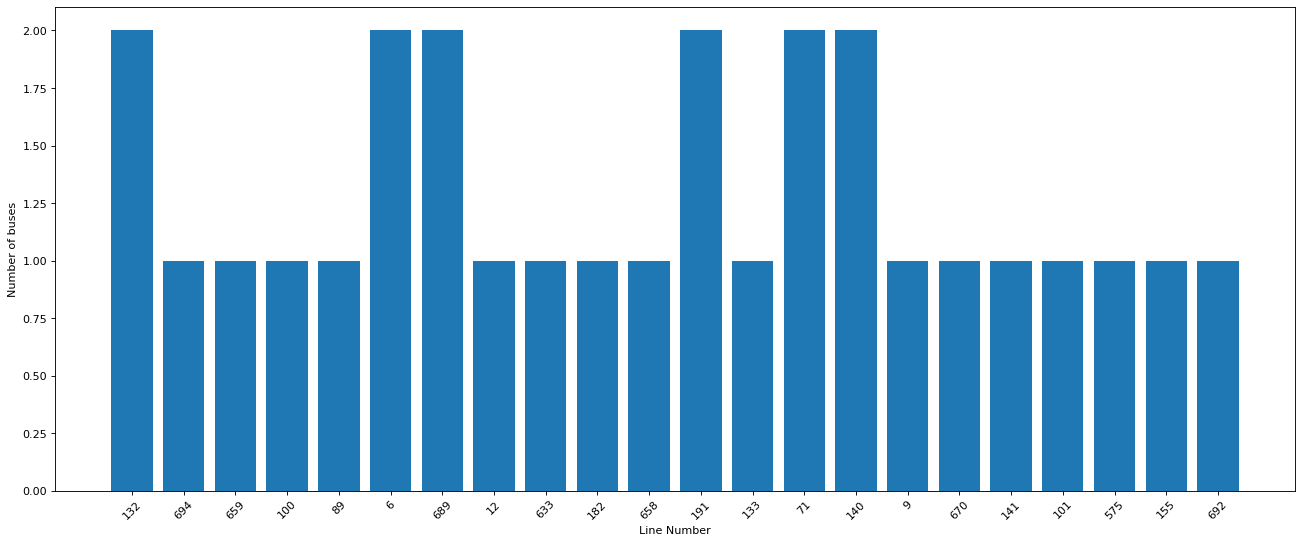

In [57]:
from matplotlib.pyplot import figure
def hist(df, column):
  histdict = {}
  for number in df[column]:
    if histdict.get(number,0) == 0:
      histdict[number] = 1
    elif histdict.get(number,0) > 0:
      histdict[number] = histdict.get(number,0) + 1
  hist = pd.DataFrame(histdict.items(), columns=['Line', 'EURO -'])
  return hist

hist_table = hist(euro3_buses, 'LineRef')

def show_hist(df,column):
  figure(figsize=(20, 8), dpi=80)
  plt.bar(df['Line'], df[column])
  plt.xticks(rotation = 45)
  plt.xlabel('Line Number')
  plt.ylabel('Number of buses')
  
  plt.show()

show_hist(hist_table, 'EURO -')

Bar chart of which buses use which lines

In [8]:
def barhist(df, column):
  histdict = {}
  for number in df[column]:
    if histdict.get(number,0) == 0:
      histdict[number] = 1
    elif histdict.get(number,0) > 0:
      histdict[number] = histdict.get(number,0) + 1
  return histdict

histdict3 = barhist(euro3_buses, 'LineRef')

def createbartable():
  stack = pd.DataFrame()
  stack['Line'] = mvj['LineRef']
  stack = stack.drop_duplicates()
  #stack['EURO III'] = histdict3
  #histdict30 = {k:[v] for k,v in histdict3.items()}
  hist3 = pd.DataFrame(histdict3.items(), columns=['Line', 'EURO III'])
  hist4 = pd.DataFrame(histdict4.items(), columns=['Line', 'EURO IV'])
  hist5 = pd.DataFrame(histdict5.items(), columns=['Line', 'EURO V'])
  hist6 = pd.DataFrame(histdict6.items(), columns=['Line', 'EURO VI'])
  stack3 = pd.merge(hist3, stack, how = 'outer')
  stack4 = pd.merge(hist4, stack3, how = 'outer')
  stack5 = pd.merge(hist5, stack4, how = 'outer')
  stack6 = pd.merge(hist6, stack5, how = 'outer')
  return stack6

# sorting required data first into its euro forms
# then creating a histogram in the form of a dictionary for each

euro4_buses = euro_class_only(ohod, 'EURO IV')
euro5_buses = euro_class_only(ohod, 'EURO V')
euro6_buses = euro_class_only(ohod, 'EURO VI')
histdict4 = barhist(euro4_buses, 'LineRef')
histdict5 = barhist(euro5_buses, 'LineRef')
histdict6 = barhist(euro6_buses, 'LineRef')

bartable = createbartable()

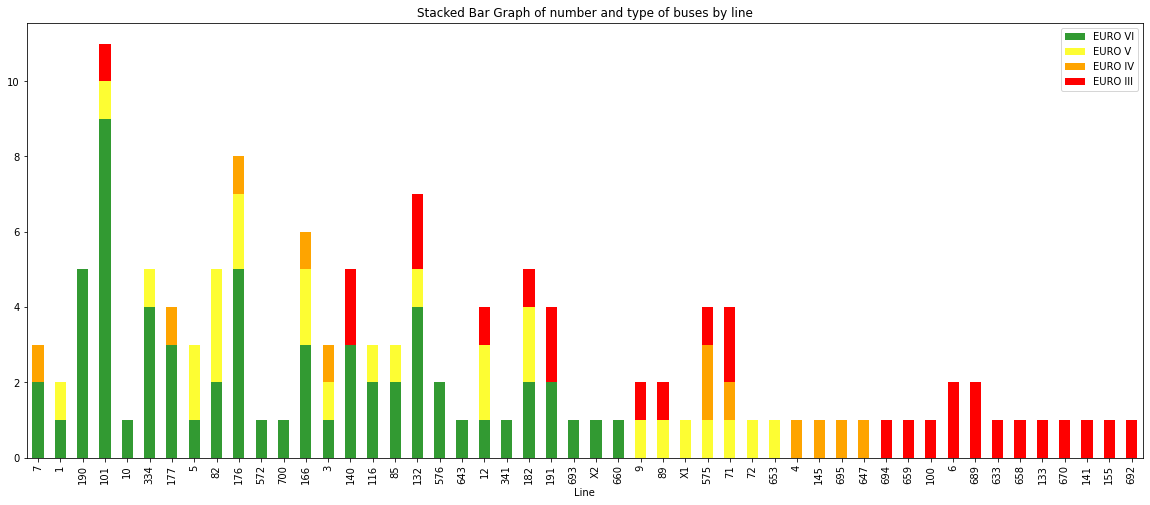

In [24]:
from matplotlib.colors import ListedColormap
import numpy as np
def showbar():  
  pink = np.array([248/256, 24/256, 148/256, 1])
  red = np.array([255/256, 0/256, 0/256, 1])
  orange = np.array([255/256, 165/256, 0/256, 1])
  yellow = np.array([254/256, 254/256, 51/256, 1])
  green = np.array([50/256, 155/256, 50/256, 1])
  newcolors = [green, yellow , orange, red]
  newcmp = ListedColormap(newcolors)
  bartable.plot(x='Line', kind='bar', stacked=True,
        title='Stacked Bar Graph of number and type of buses by line', figsize=(20,8), colormap = newcmp)
 
showbar()

next only buses which pass through the centre

In [42]:
def centre_lines(df):
  linesinarea = []
  df['VehicleLocation.Longitude'] = df['VehicleLocation.Longitude'].astype(float)
  df['VehicleLocation.Latitude'] = df['VehicleLocation.Latitude'].astype(float)
  filteredlon = df[(df['VehicleLocation.Longitude'] > 0.603210) & (df['VehicleLocation.Longitude'] < 0.617510)]
  filtered_area = filteredlon[(filteredlon['VehicleLocation.Latitude'] > 51.361462) & (filteredlon['VehicleLocation.Latitude'] < 51.364935)]
  for line in filtered_area['LineRef']:
    linesinarea.append(line)
  return linesinarea

centre_lines(mvj)
display(bartable)

,Line,EURO VI,EURO V,EURO IV,EURO III
0,7,2.0,NaN,1.0,NaN
1,1,1.0,1.0,NaN,NaN
2,190,5.0,NaN,NaN,NaN
3,101,9.0,1.0,NaN,1.0
4,10,1.0,NaN,NaN,NaN
5,334,4.0,1.0,NaN,NaN
6,177,3.0,NaN,1.0,NaN
7,5,1.0,2.0,NaN,NaN
8,82,2.0,3.0,NaN,NaN
9,176,5.0,2.0,1.0,NaN
